# Wrangling

## I. Labeling the GSR Deltas

This notebook labels each second of each raw GSR stream as a 1 if it includes a peak or with a 0 if it doesn't.

In [36]:
from datetime import datetime, time, timedelta

import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [37]:
pd.set_option('display.max_rows', 500)

In [56]:
sns.set_style('whitegrid')

### Wrangle GSR Response Data

In [57]:
gsr = pd.read_csv('../../data/intermediary/normedGSRaudioSensorData.csv', index_col='Timestamp')
gsr.index = pd.to_datetime(gsr.index)

In [58]:
gsr.columns

Index(['D5S2P2', 'D5S1P2', 'D7P1', 'D10P1', 'D4S1P2', 'D3S2P2', 'D6S2P1',
       'D9S2P1', 'D8P2', 'D9S1P1', 'D4S2P2', 'D3S1P2', 'D6S1P1', 'D4S2P1',
       'D3S1P1', 'D6S1P2', 'D9S1P2', 'D9S2P2', 'D8P1', 'D4S1P1', 'D3S2P1',
       'D6S2P2', 'D7P2', 'D10P2', 'D5S1P1', 'D5S2P1'],
      dtype='object')

In [59]:
gsr.shape

(6816, 26)

In [60]:
gsr.head()

,D5S2P2,D5S1P2,D7P1,D10P1,D4S1P2,D3S2P2,D6S2P1,D9S2P1,D8P2,D9S1P1,...,D9S1P2,D9S2P2,D8P1,D4S1P1,D3S2P1,D6S2P2,D7P2,D10P2,D5S1P1,D5S2P1
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-02-27 00:00:00.000,0.998752,0.991364,0.184426,0.000000,0.677947,0.996364,1.000000,1.000000,0.965902,0.923713,...,0.730392,0.242199,0.431274,0.730473,0.777923,0.000000,0.945385,0.398319,1.000000,0.996313
2019-02-27 00:00:00.100,0.998627,0.993130,0.183866,0.001657,0.713926,1.000000,0.995817,1.000000,0.965246,0.925213,...,0.742997,0.239585,0.428031,0.728946,0.779861,0.000000,0.940769,0.397899,0.999554,0.996108
2019-02-27 00:00:00.200,0.998502,0.994897,0.183306,0.003315,0.749905,0.998788,0.991633,1.000000,0.964918,0.926713,...,0.755602,0.236971,0.424788,0.727419,0.780829,0.000000,0.943846,0.409244,0.999108,0.995903
2019-02-27 00:00:00.300,0.998377,0.995010,0.182746,0.004972,0.726746,0.997576,0.988188,0.998311,0.964590,0.928214,...,0.768207,0.234618,0.421546,0.725892,0.781798,0.000762,0.945897,0.410924,0.998662,0.995699
2019-02-27 00:00:00.400,0.998252,0.995124,0.182185,0.006629,0.703587,0.996364,0.985432,0.996622,0.966448,0.929714,...,0.780812,0.232265,0.418303,0.724976,0.782767,0.000898,0.947949,0.411765,0.996877,0.995494


#### Normalize GSR Subject Names

_"The left person is always P2 (person 2), and they were always wearing the GSR device 92B2."_

'D4S1P2',
 'D6S1P2',
 'D3S2P2',
 'D10P2',
 'D8P2',
 'D9S2P2',
 'D5S2P2',
 'D9S1P2',
 'D5S1P2',
 'D7P2',
 'D6S2P2',
 'D3S1P2',
 'D1D2P2',
 'D4S2P2']

In [61]:
keep_cols = [col for col in gsr.columns if 'P2' in col]
sorted(keep_cols)

['D10P2',
 'D3S1P2',
 'D3S2P2',
 'D4S1P2',
 'D4S2P2',
 'D5S1P2',
 'D5S2P2',
 'D6S1P2',
 'D6S2P2',
 'D7P2',
 'D8P2',
 'D9S1P2',
 'D9S2P2']

In [62]:
gsr = gsr[keep_cols]
gsr.head()

,D5S2P2,D5S1P2,D4S1P2,D3S2P2,D8P2,D4S2P2,D3S1P2,D6S1P2,D9S1P2,D9S2P2,D6S2P2,D7P2,D10P2
Timestamp,,,,,,,,,,,,,
2019-02-27 00:00:00.000,0.998752,0.991364,0.677947,0.996364,0.965902,0.939030,0.631902,0.620892,0.730392,0.242199,0.000000,0.945385,0.398319
2019-02-27 00:00:00.100,0.998627,0.993130,0.713926,1.000000,0.965246,0.956861,0.649284,0.620305,0.742997,0.239585,0.000000,0.940769,0.397899
2019-02-27 00:00:00.200,0.998502,0.994897,0.749905,0.998788,0.964918,0.955136,0.666667,0.618545,0.755602,0.236971,0.000000,0.943846,0.409244
2019-02-27 00:00:00.300,0.998377,0.995010,0.726746,0.997576,0.964590,0.958203,0.684049,0.617371,0.768207,0.234618,0.000762,0.945897,0.410924
2019-02-27 00:00:00.400,0.998252,0.995124,0.703587,0.996364,0.966448,0.966639,0.677914,0.616197,0.780812,0.232265,0.000898,0.947949,0.411765


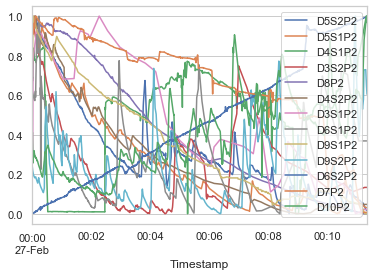

In [63]:
gsr.plot()

## Reinterpret GSR data as a Difference Series

In [66]:
gsr = gsr.diff()

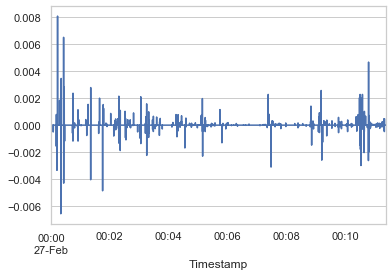

In [69]:

gsr['D5S1P2'].plot()

## Choose and Apply Delta Labeling Threshold for a Given Series

In [86]:
def label_series(the_series, threshold):
    labeled_series = pd.DataFrame(the_series)
    labeled_series['label'] = np.where(the_series > threshold, 1, 0)
    return labeled_series

In [87]:
s = gsr['D5S1P2']
df = label_series(s, 0.002)
df.head()

,D5S1P2,label
Timestamp,,
2019-02-27 00:00:00.000,NaN,0
2019-02-27 00:00:00.100,NaN,0
2019-02-27 00:00:00.200,-5.551115e-16,0
2019-02-27 00:00:00.300,-1.653061e-03,0
2019-02-27 00:00:00.400,2.220446e-16,0


In [89]:
df[df['label'] == 1].head()

,D5S1P2,label
Timestamp,,
2019-02-27 00:00:13.700,0.008047,1
2019-02-27 00:00:21.100,0.003445,1
2019-02-27 00:00:26.000,0.006481,1
2019-02-27 00:00:27.300,0.002810,1
2019-02-27 00:00:45.200,0.002355,1


In [91]:
df.tail()

,D5S1P2,label
Timestamp,,
2019-02-27 00:11:21.100,0.0,0
2019-02-27 00:11:21.200,0.0,0
2019-02-27 00:11:21.300,0.0,0
2019-02-27 00:11:21.400,0.0,0
2019-02-27 00:11:21.500,0.0,0


## II. Import Audio Features as DataFrame